## Laboratory 7: Hough Transform for line detection

- Elaborado por: Oscar Omar Martínez Lujano 
- Matrícula: 352228  
- Carrera: ITR  
- Fecha: 2019-03-22  


### Introduction




### Objectives


In this lab, you will learn about how to extract lines and circles from images using the Hough transform. Detection of features is an important part of image analysis and visual pattern recognition. Of particular interest is the identification of straight lines in images, as these appear in built indoor and outdoor environments as well as in manufactured parts. Hence, detecting lines in images play an important role in inspection, quality assessment, object detection, robot and vehicle navigation, etc. The images below illustrate three different environments where lines can be detected and can be used for scene understanding, autonomous vehicle navigation or electronic component inspection.

<img src="Figs/udem.png" width="800" alt="Combined Image" />

### Requerimientos del Laboratorio

EL software, hardware y herramientas de programación requeridas en este lab son:
  
    - Raspberry Pi with WiFi connection capabilities
    - Jupyter Notebook
    - Python >= 3.5.2
    - OpenCV 3.2
    - Git
    - GitHub account
    - Markdown editor (recommended: ReText 5.3.1)


### Procedimiento

#### Line Hough Transform

Thus far, the previous labs were focused on image processing algorithms such as colour space conversion, spatial filtering and edge detection. Today, this lab will be the first computer vision algorithm based on the Hough transform used for line detection in images. For a better understanding on how we can use the Hough transform to extract lines in images, we will go through a couple of concepts.

The Hough transform is a parametric-model based technique. A parametric model can represent a class of instances where each is defined by a value of the parameters. A line and a circle are examples of parametrised models where the line equation: `y=mx+b` that is represented by its slope m, and its y-intercept b parameters. That means that different values of m and b would allow us to instantiate different lines.

On the other hand, a circle can be parametrised by the equation:


<img src="Figs/0.gif" width="200" alt="Combined Image" />

where (h, k) and r represent the circle centre location and its radius, respectively. Similarly, different values of these parameters would allow us to represent different circles.

In order to detect lines in images, the Hough transform relies on image points belonging to edges. From our previous labs, we know how to extract edges either using the Sobel, Roberts, Scharr, and Prewitt operators.

#### Voting

Another concept to learn about is that of voting, the Hough transform relies on voting, which is a general approach where the features vote for all models that are compatible with it. It has been proved that voting techniques are robust to outliers. This is, even when noise and cluttered features participate on the voting process, voting given by good features are much more consistent. Furthermore, voting can deal with feature partially observed., providing still an appropriate set of parameters that explains the data points (edges) the best. When fitting a line to a set of points (edges), there are a few aspects to consider:

    - How many points are those that belong to a given line?
    - How many are there in the image?
    - Which points belong to which lines?
    
To answer all of the above questions, we use the Hough transform. The idea behind this algorithm is as follows:

    - 1. Each edge point votes for compatible lines
    - 2. Look for lines that obtain the majority of votes
    
#### Hough Space

The figure below illustrates how to Hough transform works. On the left coordinate frame we have a line representation in image space. This line is modelled by the parameters `m0-bo` that is mapped into a point in the Hough space on the right coordinate frame.

<img src="Figs/1.svg" width="600" alt="Combined Image" />

we can now follow the duality principle and can assume that for a given potential edge point potential-edge-point we will obtain line in the Hough space following the next relationship between image and hough space:

<img src="Figs/2hough.svg" width="600" alt="Combined Image" />
<img src="Figs/3hough.svg" width="600" alt="Combined Image" />
<img src="Figs/4hough.svg" width="600" alt="Combined Image" />

#### Line Detection Using OpenCV

OpenCV provides us with two methods for line detection using the Hough transform. These are the standard Hough transform, `cv2.HoughLines()` and the Probabilistic Hough transform `cv2.HoughLinesP`. For those of you who may be interested in the maths and details on these two line detection techniques, please, refer to the following publications.

- R. O.Duda and P.E. Hart, Use of the Hough Transformation to Detect Lines and Curves in Pictures, Graphics and Image Processing, Vol. 15 ,pp. 11-15, 1972.

- N. Kiryati, Y. Eldar, and A. M. Bruckstein, A probabilistic Hough transform, Pattern Recognition, Vol. 24 (4), pp. 303-316, 1991.

In this section, we will work on developing a vision-based driving assistance system (DAS) that will make use of the Hough transform to detect both the left and right lane lines on a road. The code below illustrate how this can be accomplished using OpenCV libraries. The first image represent the input colour image. Since the Hough transform works with single-channel images, it is necessary to convert the colour image into a greyscale format. This is shown in the second image below. This step is followed by the edge detection process show in the Canny image. These pixels are the ones used by the Probabilistic Hough transform for the line detection step that is shown in the last image.

<img src="Figs/10.png" width="600" alt="Combined Image" />
<img src="Figs/11.png" width="600" alt="Combined Image" />
<img src="Figs/12.png" width="600" alt="Combined Image" />
<img src="Figs/13.png" width="600" alt="Combined Image" />

As can be seen from this last image, lines are not detected on the sky region since, but are mainly detected on the road and on the vegetation image sections. Since we are interested on extracting the road lane lines only, we can create a region of interest (roi) on that area that encloses the road lane on which the car is being driven, so that our vision system can output the following image:

<img src="Figs/14.png" width="600" alt="Combined Image" />




### a. Libraries

The following libraries are used in the code of this lab.

- ```cv2```: Implementa una gran variedad de algorítmos de procesamiento de imágenes y visión computacional.
- ```numpy:``` Crea y manipula listas, análisis numérico, etc.
- `matplotlib.pyplot:` Produce publicaciones con figuras de calidad en una variedad de formatos de copia impresa y entornos interactivos en todas las plataformas.

In [10]:
# imported required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

### b. Line Detection Using Hough Transform

The code below illustrate how to do line detection using the Probabilistic Hough transform using the input image shown above. Please, copy, run and understand it, as this will help you accomplish your lab.

# CHANGEEE THIIIIIS
    
- `cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])`
    - Draws a line segment connecting two points.
    - img - Image
    - pt1 – First point of the line segment.
    - pt2 – Second point of the line segment.
    - color – Line color.
    - thickness – Line thickness.
    - lineType – Type of the line:
        - 8 (or omitted) - 8-connected line.
        - 4 - 4-connected line.
        - CV_AA - antialiased line.
    - shift – Number of fractional bits in the point coordinates.
    
    
- `matplotlib.pyplot.yticks(ticks=None, labels=None, **kwargs)[source]`

    - **returns**: labels - a list of text objects


Información obtenida de:
- https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html#line


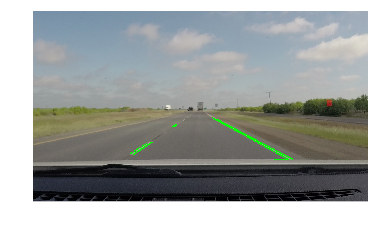

In [12]:
"""
	line_detection_using_hough_transform.py

	author: andres.hernandezg@udem.edu
	universidad de monterrey
"""

# select a region of interest
def region_of_interest(img, vertices):
    """
    Applies an image mask.

    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)

    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255

    #filling pixels inside the polygon defined by "vertices" with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

# run line detection pipeline
def run_pipeline(img_name):

    # 1.- Read image
    img_colour = cv2.imread(img_name)

    # verify that image `img` exist
    if img_colour is None:
        print('ERROR: image ', img_name, 'could not be read')
        exit()

	# 2. Convert from BGR to RGB then from RGB to greyscale
    img_colour_rgb = cv2.cvtColor(img_colour, cv2.COLOR_BGR2RGB)
    grey = cv2.cvtColor(img_colour_rgb, cv2.COLOR_RGB2GRAY)

	# 3.- Apply Gaussuan smoothing
    kernel_size = (7,7)
    blur_grey = cv2.GaussianBlur(grey, kernel_size, sigmaX=0, sigmaY=0)

	# 4.- Apply Canny edge detector
    low_threshold = 10
    high_threshold = 70
    edges = cv2.Canny(blur_grey, low_threshold, high_threshold, apertureSize=3)

	# 5.- Define a polygon-shape like region of interest
    img_shape = grey.shape

    # uncomment the following lines when extracting lines around the whole image
    
    # img_size = img_shape
    # bottom_left = (0, img_size[0])
    # top_left = (0, 0)
    # top_right = (img_size[1], 0)
    # bottom_right = (img_size[1], img_size[0])
    

	# comment the following lines when extracting  lines around the whole image

    bottom_left = (388, 626)
    top_left = (600, 460)
    top_right = (777, 458)
    bottom_right = (1128, 638)

    # create a vertices array that will be used for the roi
    vertices = np.array([[bottom_left,top_left, top_right, bottom_right]], dtype=np.int32)

	# 6.- Get a region of interest using the just created polygon. This will be
	#     used together with the Hough transform to obtain the estimated Hough lines
    masked_edges = region_of_interest(edges, vertices)

	# 7.- Apply Hough transform for lane lines detection
    rho = 1                       # distance resolution in pixels of the Hough grid
    theta = np.pi/180             # angular resolution in radians of the Hough grid
    threshold = 40                # minimum number of votes (intersections in Hough grid cell)
    min_line_len = 5              # minimum number of pixels making up a line
    max_line_gap = 5              # maximum gap in pixels between connectable line segments
    line_image = np.copy(img_colour)*0   # creating a blank to draw lines on
    hough_lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)

	# 8.- Visualise input and output images
    img_colour_with_lines = img_colour_rgb.copy()
    for line in hough_lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img_colour_with_lines, (x1, y1), (x2, y2), (0,255,0), 3)

	# visualise input and output images
    # plt.figure(1)
    # plt.imshow(img_colour_rgb)
    # plt.axis('off')

    # plt.figure(2)
    # plt.imshow(blur_grey, cmap='gray')
    # plt.axis('off')

    # plt.figure(3)
    # plt.imshow(edges, cmap='gray')
    # plt.axis('off')

    plt.figure(4)
    plt.imshow(img_colour_with_lines)
    plt.axis('off')

    plt.show()
    return None

# fun pipeline
img_name = 'highway_frame_0001.png'
run_pipeline(img_name)


TO COMPLETE THIS SECTION... implement a vision-based road lane line system capable of robustly detecting both the left and right lines in a sequence of images (video). In the `datasets` directory you will find the following video that can be used to test your implementation: `highway_right_solid_white_line_short.mp4`


The output video that you should report to pass your lab should be able to detect the road lane lines along the complete video drawing the road lines and the road lane as follows:
<img src="Figs/15.png" width="600" alt="Combined Image" />




### Conclusions


_Yo declaro, que he realizado este Laboratorio 7 con integridad académica_